# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [3]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [4]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


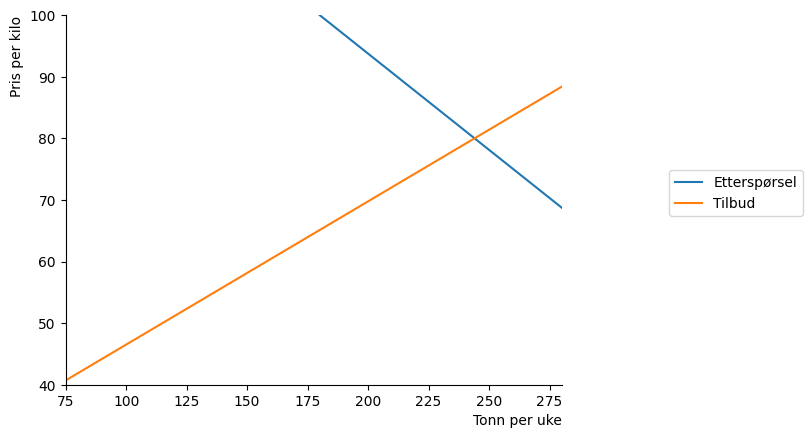

In [7]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


### Oppgave 1
Figuren nedenfor viser tilbudsfunksjonen med 25% mva i tillegg til den originale tilbudsfunksjonen.
Grunnen til at funksjonen er brattere er fordi bedriftens utgifter øker, og må dermed selge færre produkter for å oppnå samme fortjeneste/evt. dekke kostnader.

<bound method Axes.plot of <AxesSubplot:title={'center':'Tilbud med 25% mva'}, xlabel='Tonn per uke', ylabel='Pris per kilo'>>

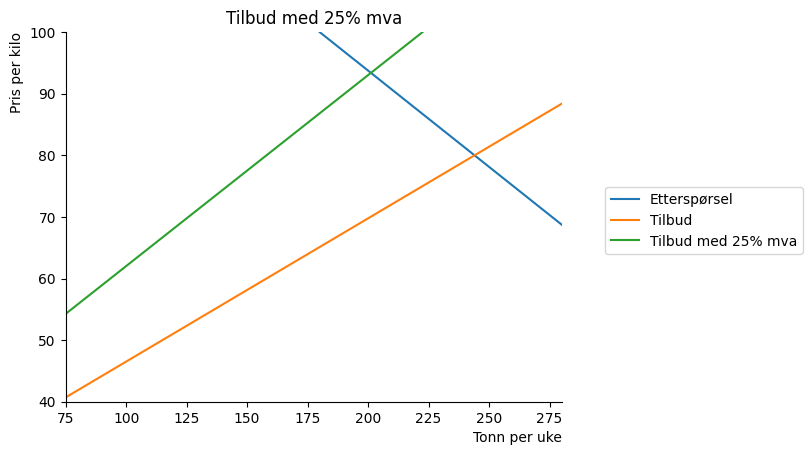

In [74]:
#oppgave 1
#skaper panel
fig, ax = create_ax()

#plotter funksjonene
ax.plot(x_d(p_num),p_num, label='Etterspørsel') #etterspørsel

ax.plot(x_s(p_num, 0),p_num, label='Tilbud') #tilbud
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva') #nytt tilbud

ax.legend(bbox_to_anchor=(1.5,0.6)); #legende

#viser plot + tittel
ax.set_title('Tilbud med 25% mva')
ax.plot


### Oppgave 2
Nedenfor ser du figuren som viser likevekt for tilbudsfunksjonene.

Den nye likevektsprisen er 93.3852140077821 kr per kilo og kvantum omsatt vil være 201.167315175097 tonn per uke.
Den gamle likevektsprisen var 80.0000000000000 kr per kilo og kvantum omsatt var 244.000000000000 tonn per uke.


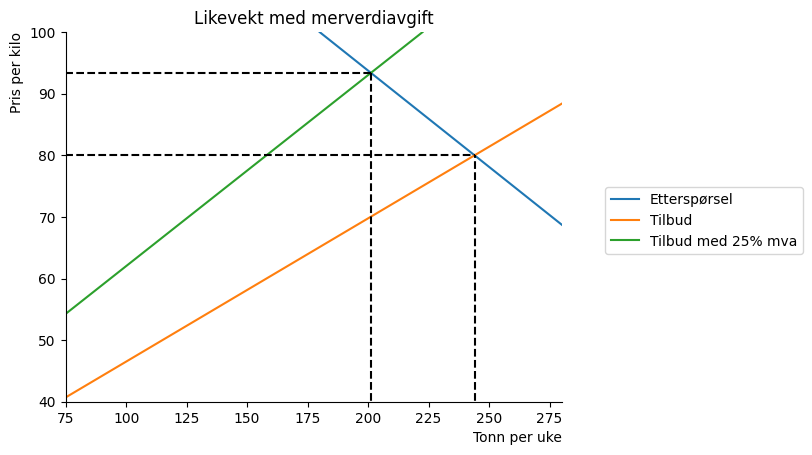

In [73]:
#definerer symboler til bruk i sympy
x,p=sp.symbols('x p', positive=True, real=True)

eq_lv_s = sp.Eq(500 - 3.2*p, -100 + 4.3*p) #likning likevektspris tilbud
eq_lv_ns = sp.Eq(500 - 3.2*p, -100 + 4.3*0.75*p) #likning likevektspris nytt tilbud

lv_p_s = sp.solve(eq_lv_s, p) #finner likevektspris tilbud
lv_p_ns = sp.solve(eq_lv_ns, p) #finner likevektspris nytt tilbud

#skaper panel
fig, ax = create_ax()

#plotter funksjonene
ax.plot(x_d(p_num),p_num, label='Etterspørsel') #etterspørsel

ax.plot(x_s(p_num, 0),p_num, label='Tilbud') #tilbud
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva') #nytt tilbud

ax.legend(bbox_to_anchor=(1.5,0.6)); #legende

#plotter inn likevekt orginalt tilbud
ax.plot ([0, x_s(lv_p_s[0], 0)], [lv_p_s[0], lv_p_s[0]], linestyle='dashed', color='black') #likvekt tilbud 
ax.plot ([x_s(lv_p_s[0], 0), x_s(lv_p_s[0], 0)], [0, lv_p_s[0]], linestyle='dashed', color='black')

#plotter inn likevekt tilbud med 25% mva
ax.plot ([0, x_s(lv_p_ns[0], 0.25)], [lv_p_ns[0], lv_p_ns[0]], linestyle='dashed', color='black') #likvekt tilbud 
ax.plot ([x_s(lv_p_ns[0], 0.25), x_s(lv_p_ns[0], 0.25)], [0, lv_p_ns[0]], linestyle='dashed', color='black')

#viser plot + tittel
ax.set_title('Likevekt med merverdiavgift')
ax.plot


print("Den nye likevektsprisen er " +str(lv_p_ns[0])+" kr per kilo og kvantum omsatt vil være " + str(x_s(lv_p_ns[0], 0.25))+ " tonn per uke.")
print("Den gamle likevektsprisen var " +str(lv_p_s[0])+" kr per kilo og kvantum omsatt var " + str(x_s(lv_p_s[0], 0)) + " tonn per uke.")

### Opppgave 3

Staten tar 23.3463035019455 kr per kilo solgt.
Av dette betaler produsenten 9.96108949416345 kr per kilo solgt og konsumenten betaler 13.3852140077821 kr per kilo solgt.
Dermed betaler konsumenten mer en produsenten av merverdiavgiften.


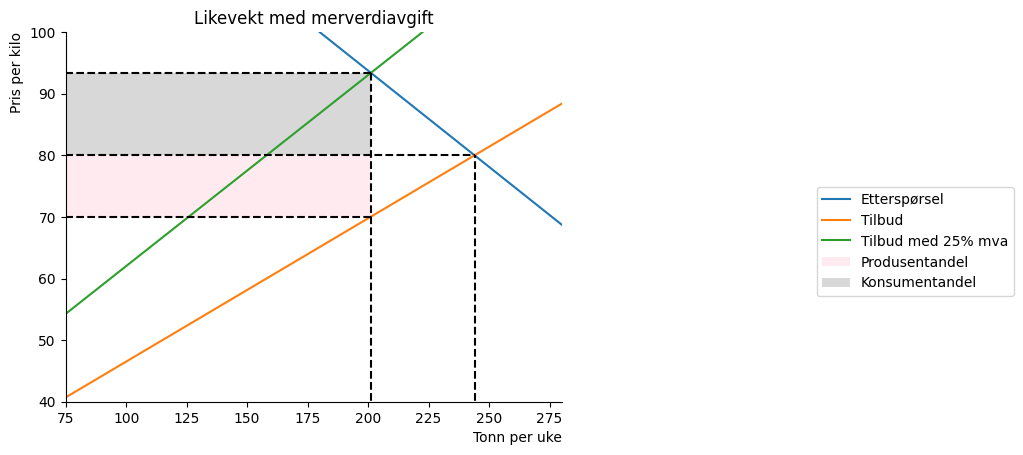

In [72]:
import matplotlib.patches as patches

#Finner pris i gammelt tilbud, når kvantum er det samme som den nye likevekten
pris_t_nt = sp.solve(sp.Eq(x_s(lv_p_ns[0], 0.25), -100 + 4.3*p), p)

#skaper panel
fig, ax = create_ax()

#plotter funksjonene
ax.plot(x_d(p_num),p_num, label='Etterspørsel') #etterspørsel

ax.plot(x_s(p_num, 0),p_num, label='Tilbud') #tilbud
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med 25% mva') #nytt tilbud

#plotter inn likevekt orginalt tilbud
ax.plot ([0, x_s(lv_p_s[0], 0)], [lv_p_s[0], lv_p_s[0]], linestyle='dashed', color='black') #likvekt tilbud 
ax.plot ([x_s(lv_p_s[0], 0), x_s(lv_p_s[0], 0)], [0, lv_p_s[0]], linestyle='dashed', color='black')

#plotter inn likevekt tilbud med 25% mva
ax.plot ([0, x_s(lv_p_ns[0], 0.25)], [lv_p_ns[0], lv_p_ns[0]], linestyle='dashed', color='black') #likvekt tilbud 
ax.plot ([x_s(lv_p_ns[0], 0.25), x_s(lv_p_ns[0], 0.25)], [0, lv_p_ns[0]], linestyle='dashed', color='black')

#plotter inn hvor kvantum er samme for ny og gammel likevekt
ax.plot ([0, x_s(pris_t_nt[0], 0)], [pris_t_nt[0], pris_t_nt[0]], linestyle='dashed', color='black') #likvekt tilbud 

#definerer rektangler
rect1 = patches.Rectangle((75, pris_t_nt[0]), x_s(pris_t_nt[0], 0)-75, lv_p_s[0]-pris_t_nt[0], linewidth=1, edgecolor='none', facecolor='pink', alpha=0.3, label="Produsentandel")
rect2 = patches.Rectangle((75, lv_p_s[0]), x_s(lv_p_ns[0], 0.25)-75, lv_p_ns[0]-lv_p_s[0], linewidth=1, edgecolor='none', facecolor='gray', alpha=0.3, label="Konsumentandel")

#legger til rektangler i plot
ax.add_patch(rect1)
ax.add_patch(rect2)

#viser plot + legende + tittel
ax.legend(bbox_to_anchor=(1.5,0.6)); #legende
ax.set_title('Likevekt med merverdiavgift')
ax.plot

#printer resultater
print("Staten tar " + str(lv_p_ns[0] - pris_t_nt[0]) + " kr per kilo solgt.") 
print("Av dette betaler produsenten "+str(lv_p_s[0]-pris_t_nt[0]) + " kr per kilo solgt og konsumenten betaler " + str(lv_p_ns[0]-lv_p_s[0]) + " kr per kilo solgt.")
print("Dermed betaler konsumenten mer en produsenten av merverdiavgiften.")

### Oppgave 4 
Fordel med mva er at det er en enkel måte for staten å samle inn penger, som videre skal finansiere offentlige tjenester. I tillegg bidrar alle forbrukere av dette. 
Ulempen er at prisen for forbrukerne blir høye, og at varer i teorien kan bli mindre attraktive å kjøpe. 

Vi kan også skattelegge ved bruk av stykkprisavgift. Dette er en fin måte for stat å samle inn penger for evt. skadelig konsum, som kan medføre staten høyere utgifter.
En ulempe med dette er at det er vanskelige å beregne, samt at mindre person bidrar. 